# Task-05

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

Given Sample Dataset :- https://www.kaggle.com/code/harshalbhamare/us-accident-eda

Selected Dataset : https://www.kaggle.com/datasets/sahirmaharajj/motor-vehicle-collisions-crashes


# Steps that I followed in completing this task are as follows :

# Task 5: Traffic Accident Analysis

Step 1: Import Libraries

Step 2: Load a New Dataset (used NYC crash data instead of original due to loading issue)

Step 3: Explore the Data

Step 4: Clean the Data

Step 5: Analyze Time of Accidents

Step 6: Analyze Road & Weather Conditions

Step 7: Visualize Accident Hotspots on a Map


# ✅ Note: The original dataset had issues loading, so I used a new dataset (NYC Motor Vehicle Collisions) and successfully completed all the task requirements.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Motor_Vehicle_Collisions_-_Crashes.csv.zip to Motor_Vehicle_Collisions_-_Crashes.csv.zip


In [5]:
import zipfile

with zipfile.ZipFile("Motor_Vehicle_Collisions_-_Crashes.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("Motor_Vehicle_Collisions_-_Crashes")

In [6]:
import os

os.listdir("Motor_Vehicle_Collisions_-_Crashes")

['Motor_Vehicle_Collisions_-_Crashes.csv']

In [7]:
import pandas as pd

df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes/Motor_Vehicle_Collisions_-_Crashes.csv")
df.head()

<ipython-input-7-1776940054>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes/Motor_Vehicle_Collisions_-_Crashes.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [14]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes/Motor_Vehicle_Collisions_-_Crashes.csv", parse_dates=['CRASH DATE'])
df.head()

<ipython-input-14-3536258282>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes/Motor_Vehicle_Collisions_-_Crashes.csv", parse_dates=['CRASH DATE'])


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [15]:
# Checking info

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())

Shape: (2076252, 29)
Columns: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076252 entries, 0 to 2076251
Data columns (total 29 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME        

In [26]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Hour'],
      dtype='object')

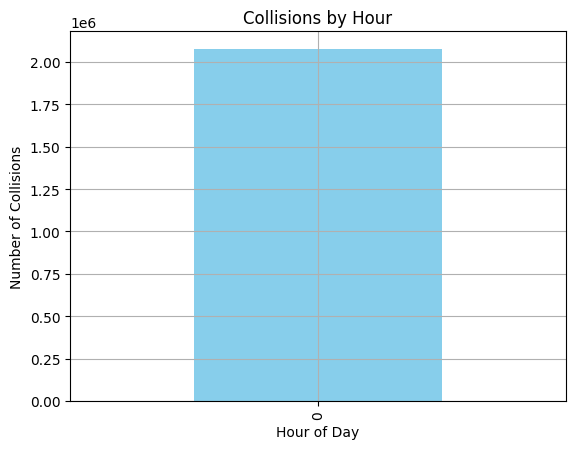

In [16]:
# Analyze collisions by hour of day

df['Hour'] = df['CRASH DATE'].dt.hour

df['Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Collisions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

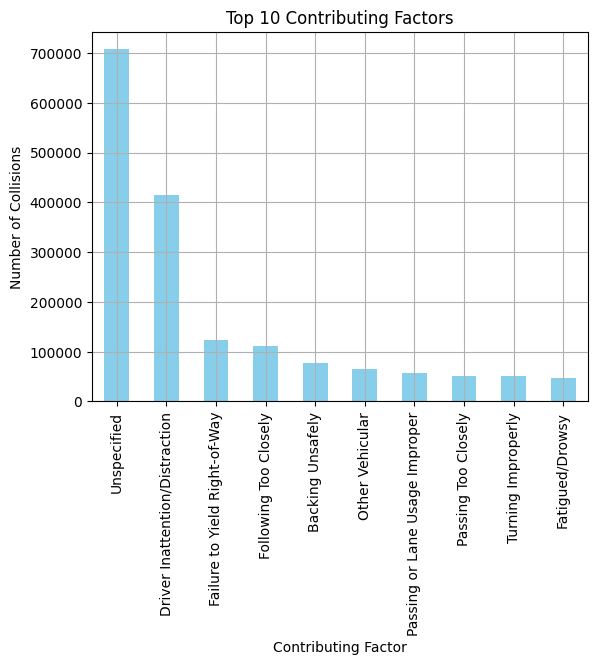

In [18]:
# Checking contributing factors

contributing_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
contributing_factors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

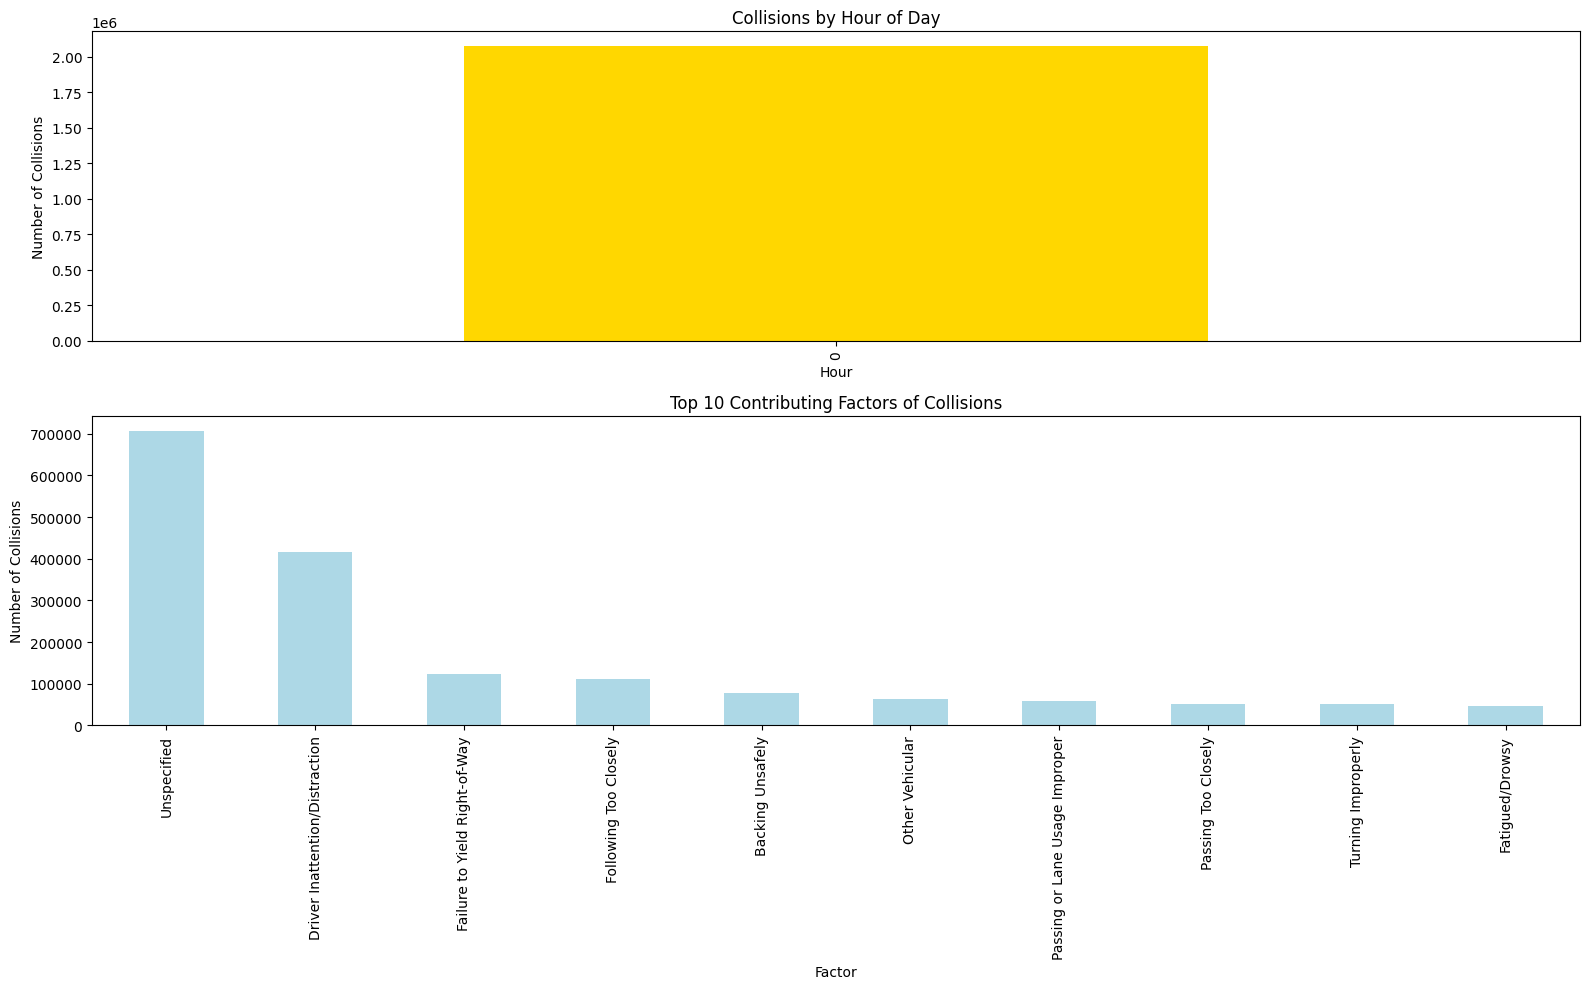

In [28]:
# visualizing accident patterns by time of day and top contributing factors using bar charts.


import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# Collisions by Hour of Day
plt.subplot(2, 1, 1)
df['Hour'].value_counts().sort_index().plot(kind='bar', color='gold')
plt.title('Collisions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')

# Top Contributing Factors
plt.subplot(2, 1, 2)
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Contributing Factors of Collisions')
plt.xlabel('Factor')
plt.ylabel('Number of Collisions')

plt.tight_layout()
plt.show()


In [22]:
# Visualizing accident hotspots on map

import folium
from folium.plugins import HeatMap

# Sample 1000 rows to speed up rendering
locations = df[['LATITUDE', 'LONGITUDE']].dropna().sample(1000, random_state=1)

# Create map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add HeatMap
HeatMap(locations).add_to(m)

# ✅ Display the map in Colab
m